In [1]:
# Step 1: import librires

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
# Basic Data Checks EDA PROCESS

In [6]:
df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [10]:
df=df.drop_duplicates()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [13]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


In [14]:
# Univariate Analysis(each column Separatley)
# Numerical Features: histograms+boxplots

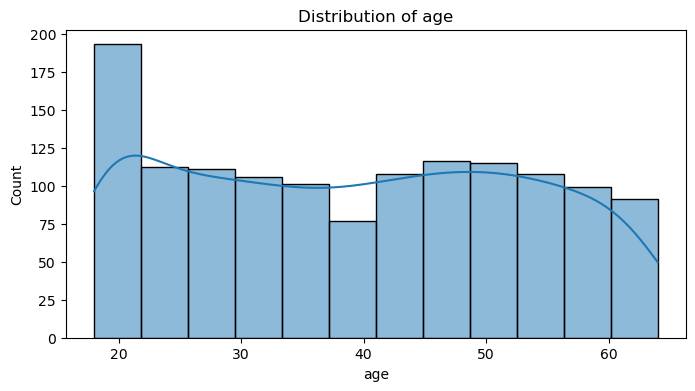

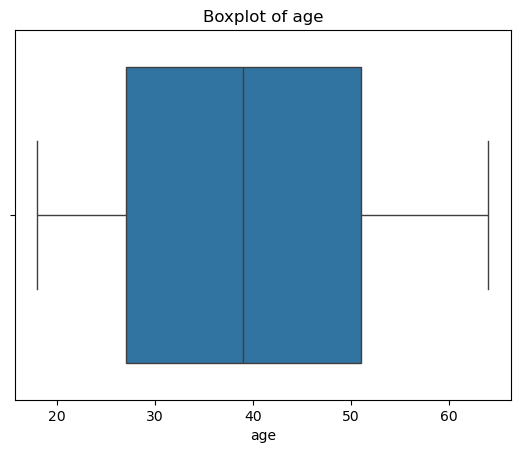

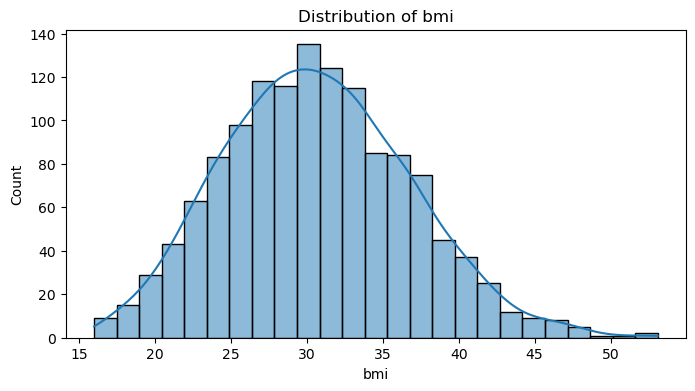

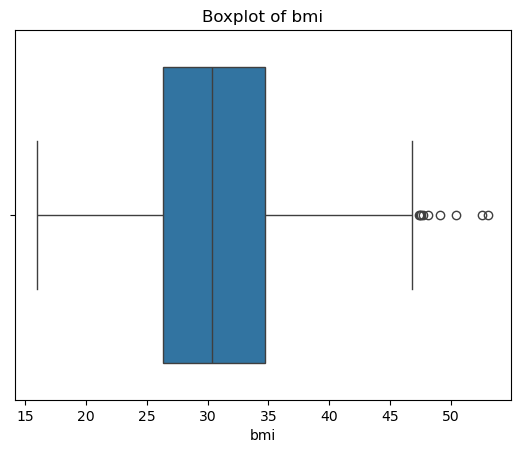

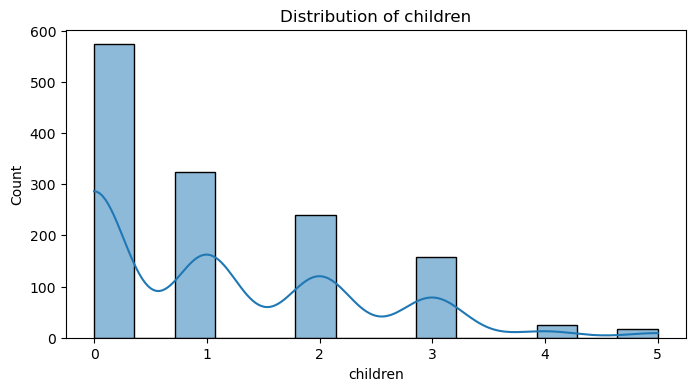

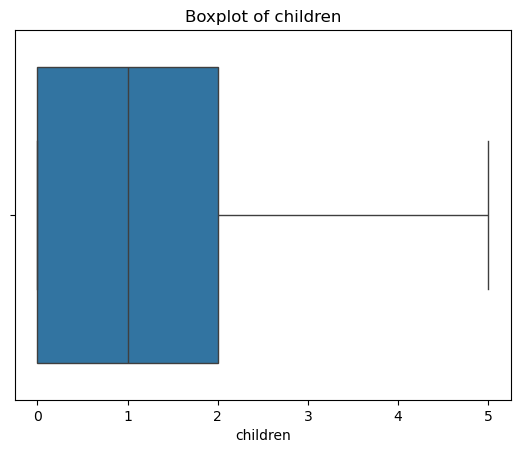

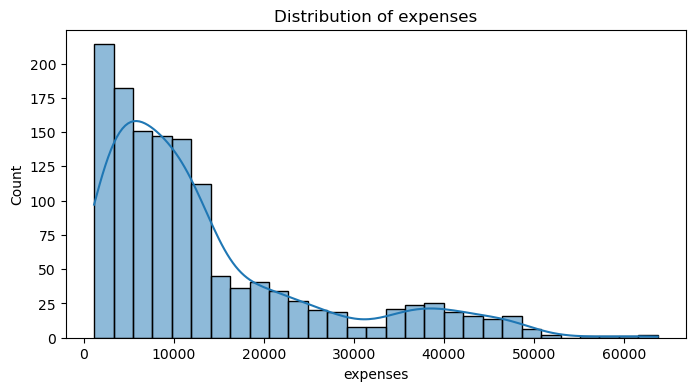

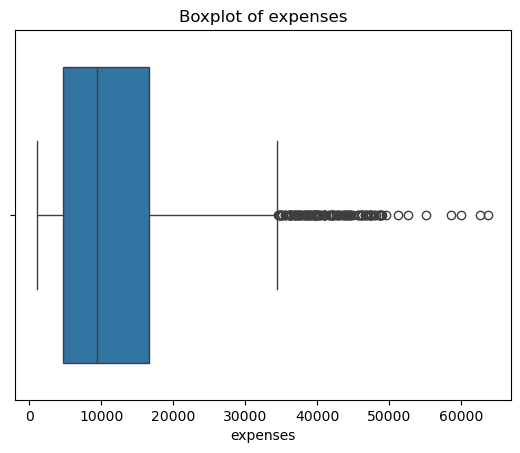

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['age', 'bmi', 'children', 'expenses']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [16]:
 # Categorical features:Countplots

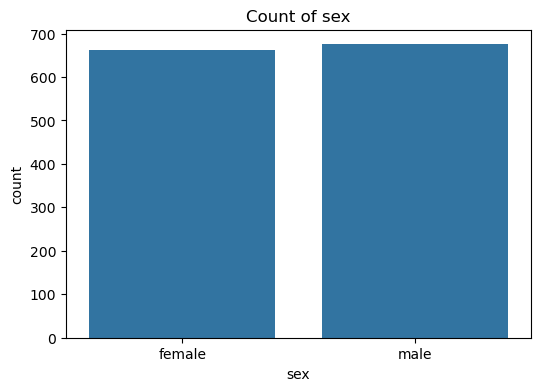

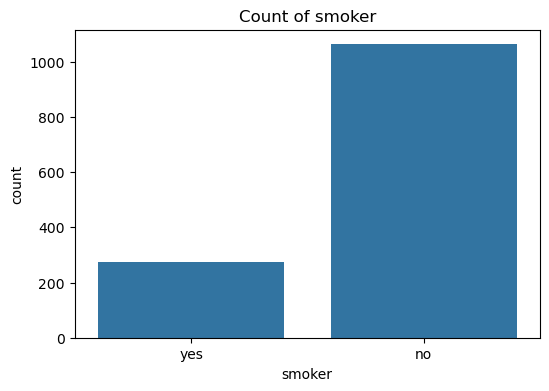

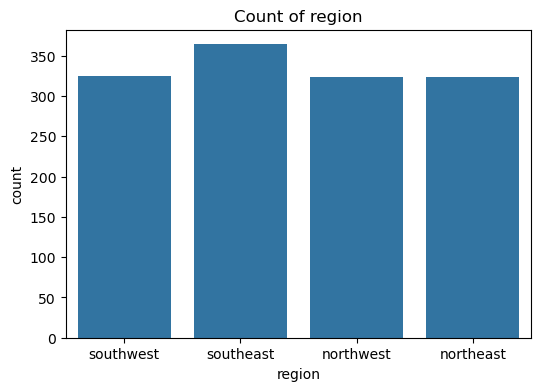

In [17]:
cat_cols = ['sex', 'smoker', 'region']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
    plt.show()

In [18]:
# Bivariate Analysis (Features vs Target)--->Expenses

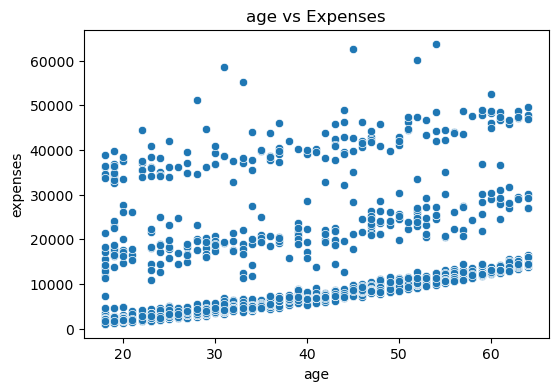

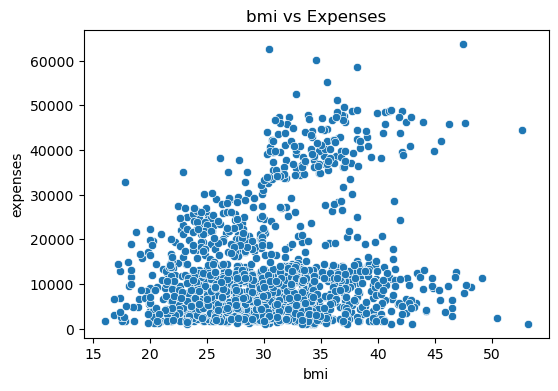

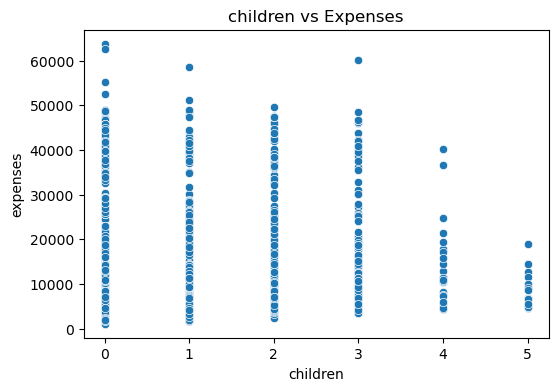

In [19]:
# Numerical vs Target
for col in ['age', 'bmi', 'children']:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['expenses'])
    plt.title(f"{col} vs Expenses")
    plt.show()

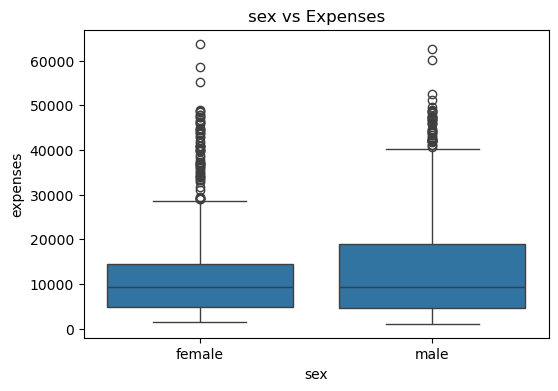

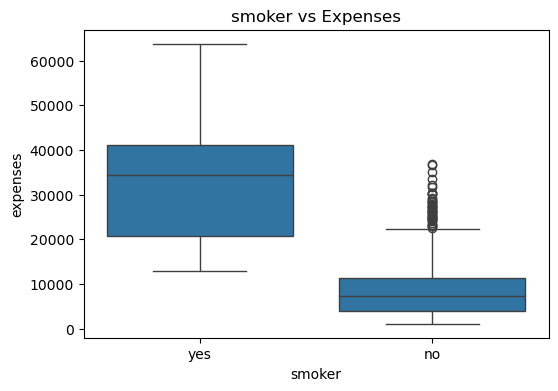

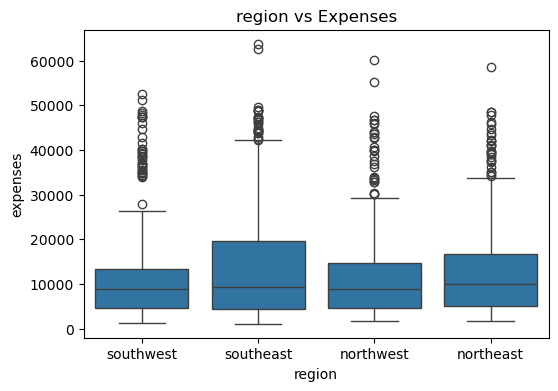

In [20]:
# Categorical vs Target
for col in ['sex', 'smoker', 'region']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], y=df['expenses'])
    plt.title(f"{col} vs Expenses")
    plt.show()

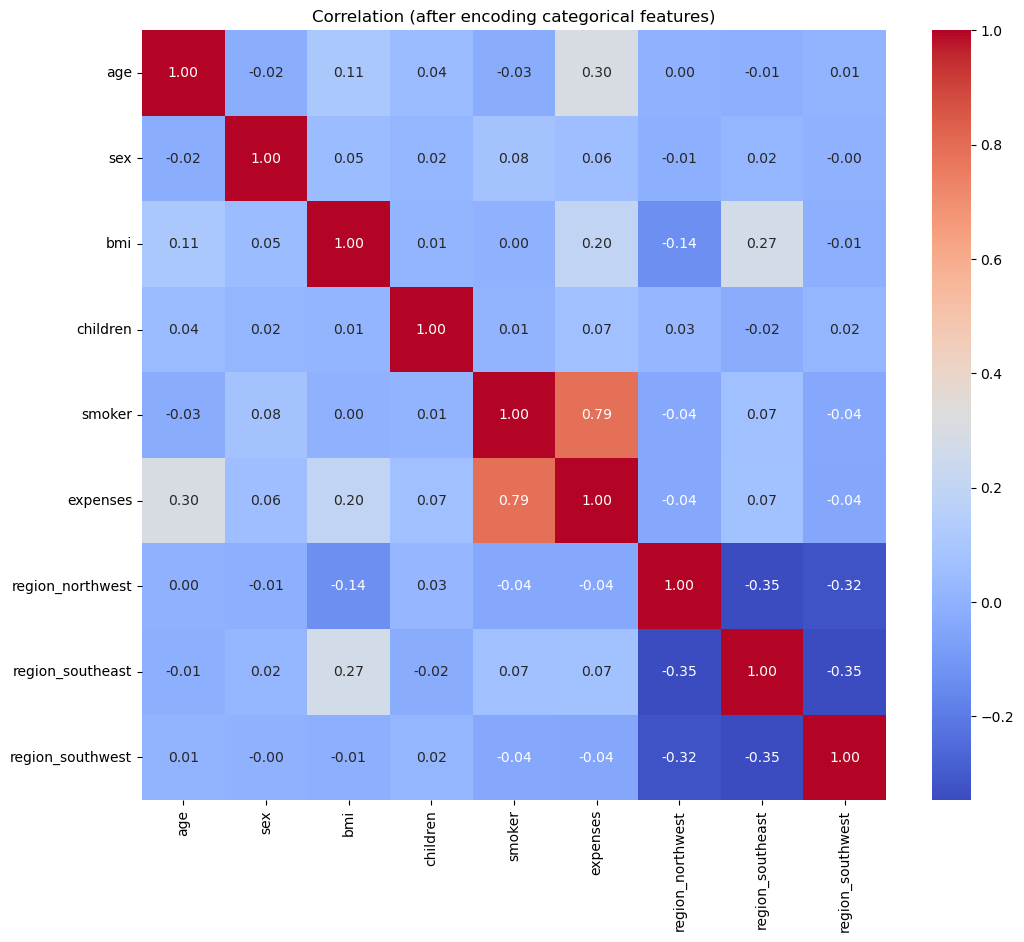

In [21]:
df_enc = df.copy()
df_enc['sex'] = df_enc['sex'].map({'female':0, 'male':1})        # adjust mapping if needed
df_enc['smoker'] = df_enc['smoker'].map({'no':0, 'yes':1})       # adjust mapping if needed

# one-hot encode region (creates region_southeast, etc.)
df_enc = pd.get_dummies(df_enc, columns=['region'], drop_first=True)

# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_enc.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation (after encoding categorical features)")
plt.show()

In [22]:
corr_series = df_enc.corr()['expenses'].sort_values(ascending=False)
print(corr_series) # I have printed Expenses in Ascending Order

expenses            1.000000
smoker              0.787234
age                 0.298308
bmi                 0.198637
region_southeast    0.073578
children            0.067389
sex                 0.058045
region_northwest   -0.038695
region_southwest   -0.043637
Name: expenses, dtype: float64


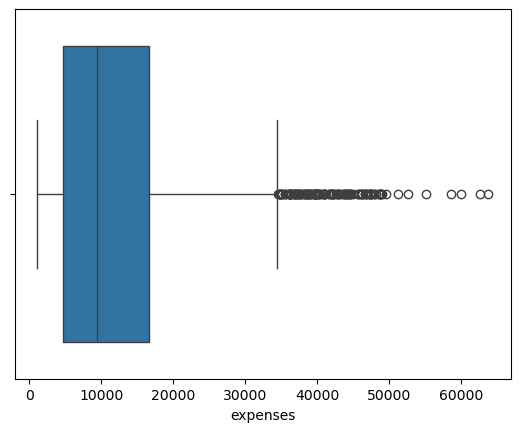

In [23]:
 # Outlier Detection
sns.boxplot(x=df['expenses'])
plt.show()

 # EDA PROCESS SUMMARY
The dataset has 1338 records with 7 features and no missing values.
Expenses are highly skewed with a few very large outliers.
Smoker status shows the strongest impact on expenses, with smokers paying much higher costs.
Age and BMI also influence expenses, where older individuals and those with higher BMI tend to spend more.
Children, sex, and region have very little effect on expenses.
Overall, smoker, age, and BMI emerge as the key predictors for medical cost prediction.

# MODEL BUILDING

In [24]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [29]:
#Feature Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and target
x = df_encoded.drop("expenses", axis=1)
y = df_encoded["expenses"]

In [32]:
# Train-test split
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 8)
(268, 8)
(1069,)
(268,)


In [33]:
# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [35]:
# Train and evaluate each model
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append([name, r2, mae, rmse])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE", "RMSE"])
print(results_df)

               Model  R² Score          MAE         RMSE
0  Linear Regression  0.806910  4177.267596  5956.632572
1   Ridge Regression  0.805937  4194.233151  5971.620406
2   Lasso Regression  0.806909  4177.276075  5956.643411
3      Decision Tree  0.797503  2846.938918  6099.997762
4      Random Forest  0.880013  2641.143735  4695.562432
5  Gradient Boosting  0.899951  2534.757235  4287.734264


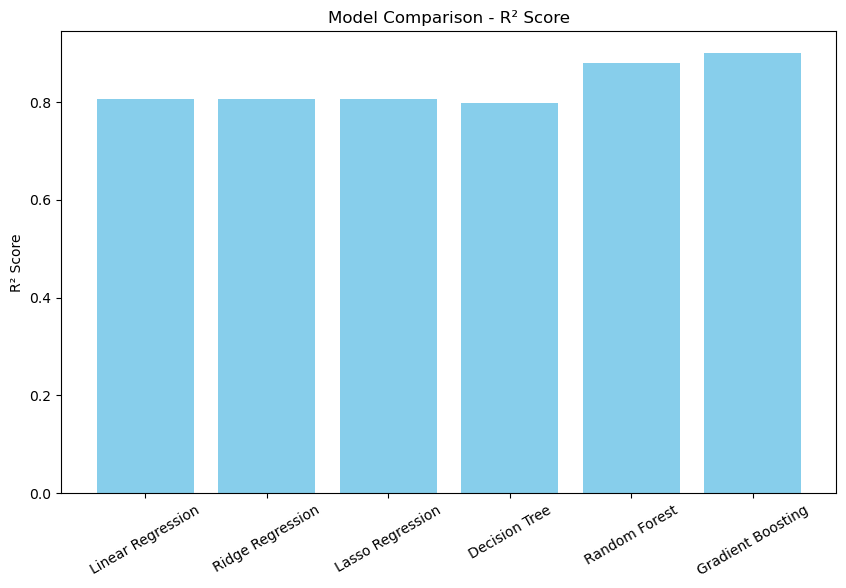

In [36]:
# Plot comparisons
plt.figure(figsize=(10,6))
plt.bar(results_df["Model"], results_df["R² Score"], color="skyblue")
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.xticks(rotation=30)
plt.show()


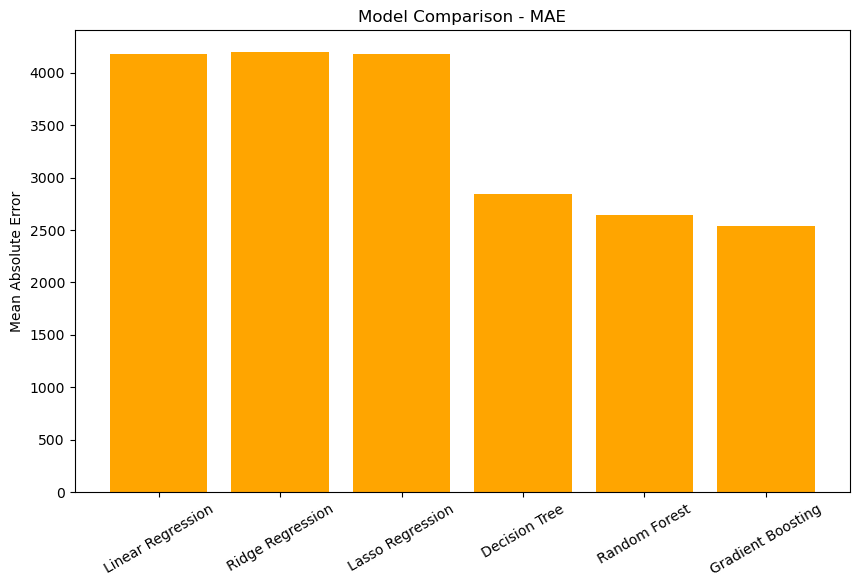

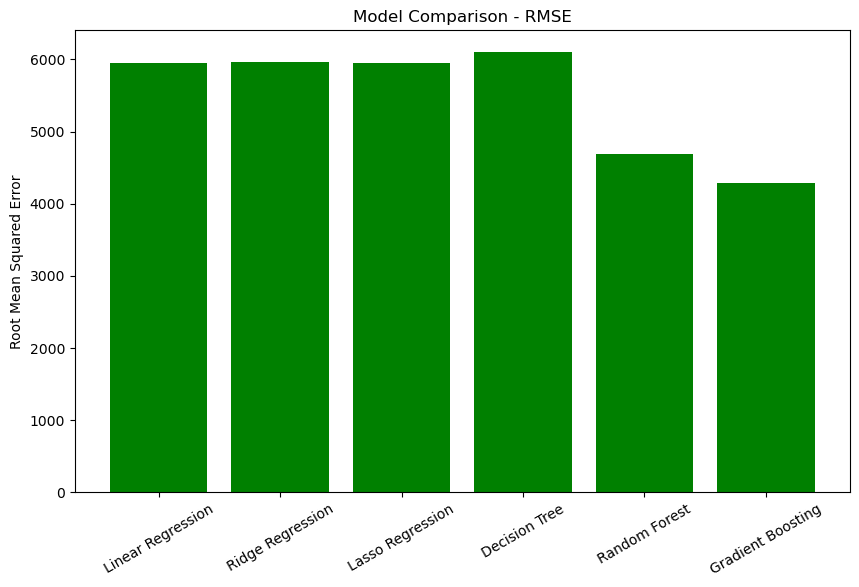

In [37]:
plt.figure(figsize=(10,6))
plt.bar(results_df["Model"], results_df["MAE"], color="orange")
plt.title("Model Comparison - MAE")
plt.ylabel("Mean Absolute Error")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(results_df["Model"], results_df["RMSE"], color="green")
plt.title("Model Comparison - RMSE")
plt.ylabel("Root Mean Squared Error")
plt.xticks(rotation=30)
plt.show()

In [39]:
import pickle 

In [40]:
# Train Random Forest (best model)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Save model as pickle file
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("✅ Model saved as model.pkl")

✅ Model saved as model.pkl
